# ADVANCED CLASSIFICATION PREDICT

# EA Twitter Sentiment Classification


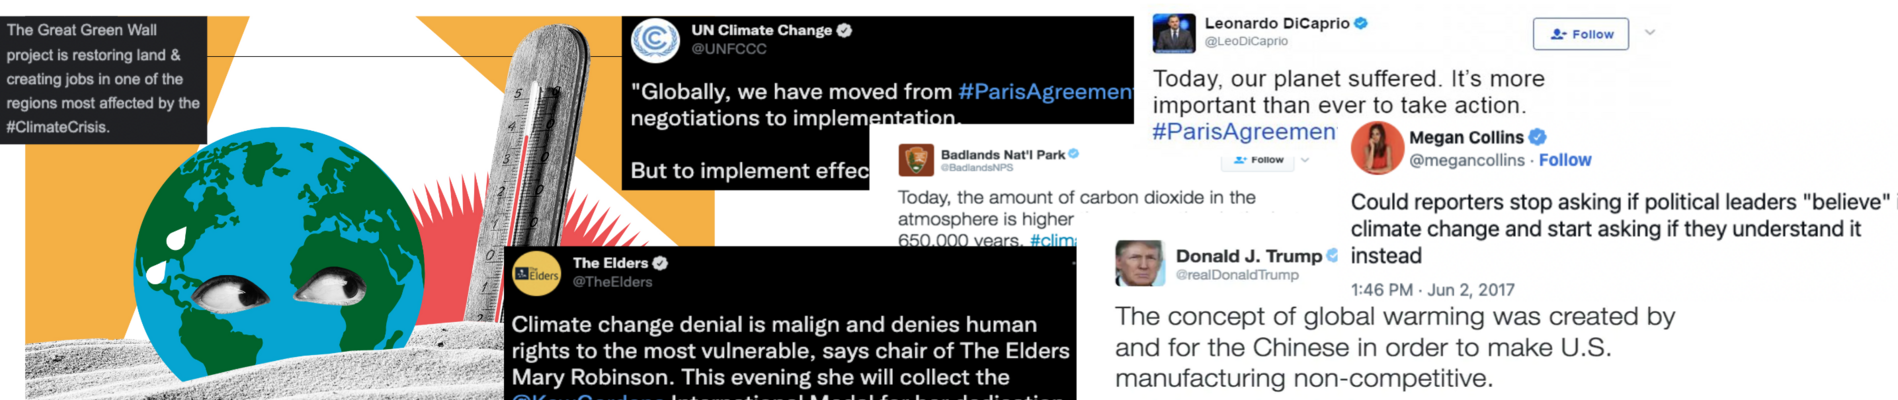

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Introduction</a>

<a href=#two>2. Importing packages</a>

<a href=#three>3. Loading Data</a>

<a href=#four>4. Exploratory Data Analysis (EDA)</a>

<a href=#five>5. Data Engineering</a>

<a href=#six>6. Modeling</a>

<a href=#seven>7. Model Performance</a>

<a href=#eight>8. Model Explanation</a>

<a href=#nine>8. Conclusions</a>

<a id="one"></a>

## 1. Introduction

<a href=#cont>Back to Table of Contents</a>

---

| ⚡ Description: Importing Packages ⚡                                                                                                    |
| :--------------------------------------------------------------------------------------------------------------------------------------- |
| In this section we intoduced the predict and listed the objectives and data description. |

---



In the wake of unprecedented changes in our natural environment, the discourse on climate change has evolved into one of the most critical conversations of our time. As the Earth undergoes transformations, the need to understand how societies perceive and respond to these changes becomes paramount. The data at our disposal serves as a crucial lens through which we can explore public perspectives on climate change and delve into the question of whether it is universally regarded as a real threat.

Objectives:
1. To determine how people perceive climate change and whether or not they believe it is a real threat 
2. Creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Dataset Description

- The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo. The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43,943 tweets were collected. Each tweet is labelled as one of 4 classes, which are described below.

Class Description

- 2 News: the tweet links to factual news about climate change

- 1 Pro: the tweet supports the belief of man-made climate change

- 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change

- -1 Anti: the tweet does not believe in man-made climate change Variable definitions

Features

sentiment: Which class a tweet belongs in (refer to Class Description above)

- message: Tweet body

- tweetid: Twitter unique id

The files provided

train.csv - You will use this data to train your model.

test.csv - You will use this data to test your model.

<a id="two"></a>

## 2. Importing Packages

<a href=#cont>Back to Table of Contents</a>

---

| ⚡ Description: Importing Packages ⚡                                                                                                    |
| :--------------------------------------------------------------------------------------------------------------------------------------- |
| In this section we imported the libraries that will be used throughout your analysis and modelling. |

---


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
import nltk
import re
import string
import timeit
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
nltk.download('vader_lexicon')
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression #Import Logistic Regression from the sklearn
from sklearn.svm import SVC #Import LinearSVC from the sklearn
from sklearn.svm import LinearSVC #Import LinearSVC from the sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.feature_selection import VarianceThreshold
from wordcloud import WordCloud,ImageColorGenerator
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.feature_extraction.text import CountVectorizer #Import CountVectorizer from sklearn
from sklearn.preprocessing import StandardScaler
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\percy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\percy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\percy\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\percy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\percy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\percy\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


<a id="two"></a>

## 2. Loading the Data

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

| ⚡ Description: Loading the data ⚡                                                          |
| :------------------------------------------------------------------------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
df_test = pd.read_csv ("test_with_no_labels.csv")


In [3]:
df_train = pd.read_csv("train.csv")


# Preprocessing

In [4]:
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [5]:
df_test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \r\nPu...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


data processing

<a id="four"></a>

## 4. Exploratory Data Analysis (EDA)

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

| ⚡ Description: Exploratory data analysis ⚡                                                             |
| :------------------------------------------------------------------------------------------------------- |
| In this section, we performed an in-depth analysis of all the variables in the DataFrame. |

---


The EDA  includes:
- Summary analysis
- Null values
- Classes of tweets - Sentiments
- Number of words of tweets



Summary analysis

In [6]:
df_train.describe()


,sentiment,tweetid
count,15819.000000,15819.000000
mean,0.917504,501719.433656
std,0.836537,289045.983132
min,-1.000000,6.000000
25%,1.000000,253207.500000
50%,1.000000,502291.000000
75%,1.000000,753769.000000
max,2.000000,999888.000000


In [7]:
df_test.describe()


,tweetid
count,10546.000000
mean,496899.936943
std,288115.677148
min,231.000000
25%,246162.500000
50%,495923.000000
75%,742250.000000
max,999983.000000


Null values

In [8]:
df_test.isnull().sum()

message    0
tweetid    0
dtype: int64

In [9]:
df_train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

There are no null values in the test and train data

Ckecking the number of rows and columns in our data

In [10]:
df_train.shape

(15819, 3)

In [11]:
df_test.shape

(10546, 2)

- There are 3 columns and 15819 rows in train data
- There are 2 coluns and 10546 rows in test data

Sentiments meaning as mentioned in the introduction

- Negative climate Change = -1
- Neutral = 0
- Positive Climate change = 1
- News = 2

Comparing the number of tweets of sentiments
- Distribution
- Pie chart
- Word cloud
- Top 20 words used

Bar chart showing the counts of tweets per sentiment

In [12]:
#Sentiments meaning as mentioned in the introduction
senti_counts = df_train["sentiment"].value_counts()
news = senti_counts[2] 
pro = senti_counts[1]   
neutral = senti_counts[0]
anti = senti_counts[-1]  



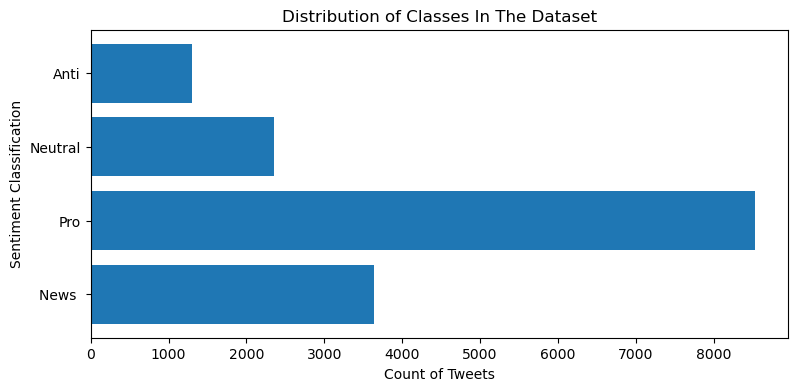

In [13]:
plt.figure( figsize=(9,4))
plt.barh(['News ','Pro','Neutral','Anti'], [news,pro,neutral,anti]) # horizontal bar graph to compare classes of tweets.
plt.colours = ['red', 'green', 'blue', 'orange']
plt.xlabel('Count of Tweets') #X-label of the data
plt.ylabel('Sentiment Classification') #Y_label of the data 
plt.title('Distribution of Classes In The Dataset') #Give the data a title 'Dataset lables distribution'
plt.show()

Pie chart showing the percentages of tweets per sentiment - Which one has the highest proportion between news and pro climate change

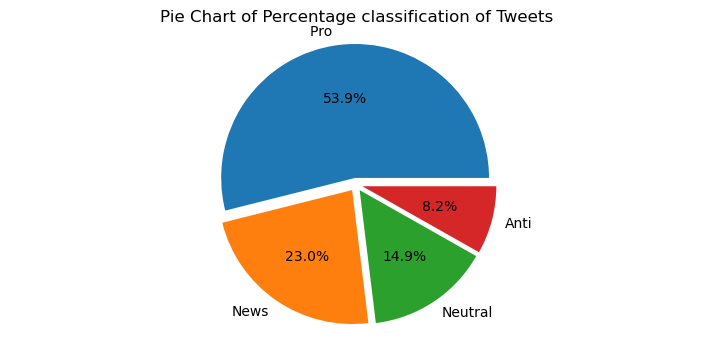

In [14]:
class_counts = df_train["sentiment"].value_counts()
plt.figure( figsize=(9,4))
plt.pie(class_counts, labels=['Pro ','News','Neutral','Anti'], explode=[0.05,0.05,0.05,0.05], autopct='%1.1f%%')
plt.title("Pie Chart of Percentage classification of Tweets ")
plt.axis('equal')
plt.show()

Insights:
- News has the highest percentage of tweets followed by Pro climate change, Neutral and anti climate change respectively

<a id="five"></a>

## 5. Feature Engineering

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

| ⚡ Description Feature engineering ⚡                                                                                        |
| :------------------------------------------------------------------------------------------------------------------------- |
| In this section we cleaned the data, added new features- as identified in the EDA phase. |

---


## 5.1 Adding and removing columns

### 5.1.1.Adding Length tweets column

In [15]:
length = [len(tweet) for tweet in df_train['message']]
df_train['length'] = length

Comparing the *length of the tweet* per categories
- Box plots
- Distribution bar graphs
- Summary of Stats
- Correlation

A.Box and whisker plot for tweet per category

In [16]:
#creating class subsets for the datase
df_anti = df_train.copy()[df_train['sentiment'] == -1]
df_neutral = df_train.copy()[df_train['sentiment'] == 0]
df_pro = df_train.copy()[df_train['sentiment'] == 1]
df_news = df_train.copy()[df_train['sentiment'] == 2]



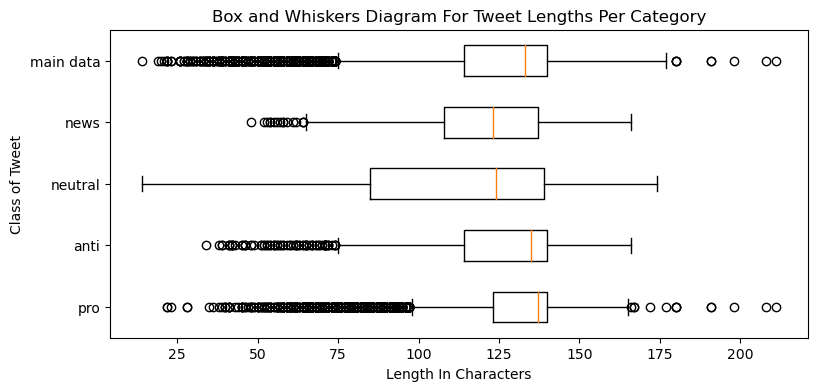

In [17]:
#storing the size data in separate variables
pro_len = df_pro['length']
neutral_len = df_neutral['length']
anti_len = df_anti['length']
news_len = df_news['length']
data_len = df_train['length']

#creating a list of all the length datasets
len_data = [pro_len, anti_len, neutral_len, news_len, data_len]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(9,4))

# Create the box plots
ax.boxplot(len_data, vert=False)

# Set the labels for each box plot
labels = ['pro', 'anti', 'neutral', 'news', 'main data']
ax.set_yticklabels(labels)

# Set the title and axis labels
plt.title('Box and Whiskers Diagram For Tweet Lengths Per Category')
plt.xlabel('Length In Characters')
plt.ylabel('Class of Tweet')

# Show the plot
plt.show()

B. Summary of categories

In [18]:
print('mean of pro-climate is:  ', round(df_pro['length'].mean(),2))
round(df_pro['length'].describe(),2)

mean of pro-climate is:   129.13


count    8530.00
mean      129.13
std        20.00
min        22.00
25%       123.00
50%       137.00
75%       140.00
max       211.00
Name: length, dtype: float64

In [19]:
print('mean of anti-climate is:  ', round(df_anti['length'].mean(),2))
round(df_anti['length'].describe(),2)

mean of anti-climate is:   123.96


count    1296.00
mean      123.96
std        24.38
min        34.00
25%       114.00
50%       135.00
75%       140.00
max       166.00
Name: length, dtype: float64

In [20]:
print('mean of neutral-climate is:  ', round(df_neutral['length'].mean(),2))
round(df_neutral['length'].describe(),2)

mean of neutral-climate is:   111.12


count    2353.00
mean      111.12
std        32.46
min        14.00
25%        85.00
50%       124.00
75%       139.00
max       174.00
Name: length, dtype: float64

In [21]:
print('mean of news is:  ', round(df_news['length'].mean(),2))
round(df_news['length'].describe(),2)

mean of news is:   120.0


count    3640.00
mean      120.00
std        19.03
min        48.00
25%       108.00
50%       123.00
75%       137.00
max       166.00
Name: length, dtype: float64

The pro tweets length have the highest mean followed by anti, news and neutral respectively.

C. Bar graph showing distribution of tweet lengths

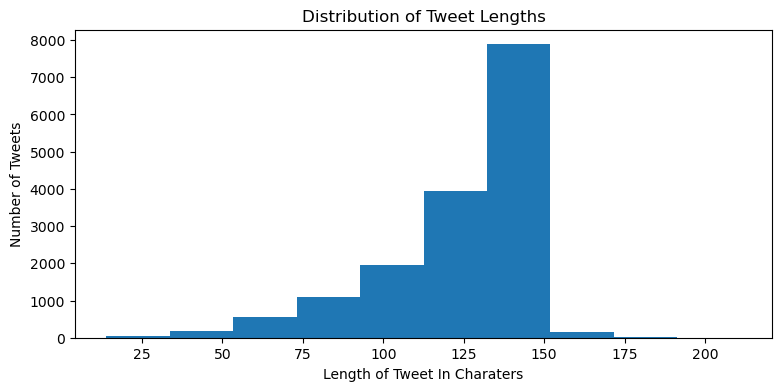

In [22]:
plt.figure( figsize=(9,4))
plt.hist(df_train['length'])
plt.title("Distribution of Tweet Lengths")
plt.xlabel("Length of Tweet In Charaters") #X-label of the data
plt.ylabel("Number of Tweets")      #Y_label of the data
plt.show()

The highest number of tweets lie between the 125 - 150 length of characters

D. Correlation between length of tweets and sentiment 

C:\Users\percy\AppData\Local\Temp\ipykernel_31336\28272172.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_train.corr()


Text(0.5, 1.0, 'Correlation with sentiments')

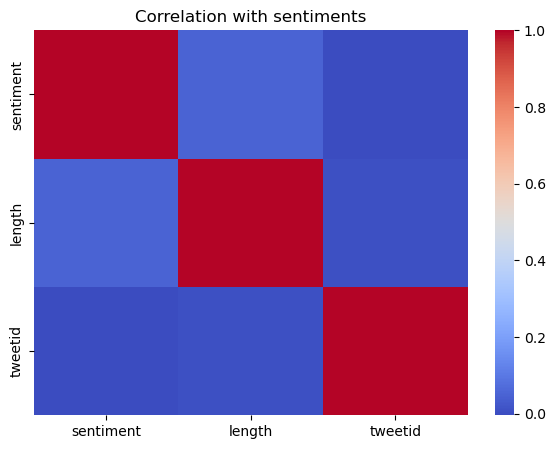

In [23]:
# Calculate the correlation matrix
correlation_matrix = df_train.corr()

# Calculate the correlations with the target variable
target_correlations = correlation_matrix['sentiment']

# Sort the features by their correlations with the target variable
sorted_features = target_correlations.abs().sort_values(ascending=False).index

# Reorder the correlation matrix
sorted_corr_matrix = correlation_matrix.loc[sorted_features, sorted_features]

# Create a heatmap for the sorted correlations without annotations
plt.figure(figsize=(7, 5))
sns.heatmap(sorted_corr_matrix, cmap='coolwarm')
plt.title('Correlation with sentiments')

There is no correlation between the tweet id, length and sentiment

### 5.1.2 Dropping tweet Id 

Reason: Tweet Id has no significance in our analysis as it is only a unique number of the tweet.

In [24]:
df_train = df_train.drop('tweetid', axis=1)

## 5.2 Data cleaning 
In order to process the tweet messages more effectively the tweets are cleaned using the clean function defined in the code cell below. The clean function does the following.

- Remove urls
- Convert all tweet text to lowercase.
- Remove punctuation, numbers & emojis
- Remove stopwords

### 5.2.1 Removing the web-urls

In [25]:
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
df_train['CleanMessage'] = df_train['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)


In [26]:
df_test['CleanMessage']  = df_test['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

### 5.2.2 Converting every word to lower case

In [27]:
df_train['CleanMessage'] = df_train['CleanMessage'].str.lower()

df_train['CleanMessage'].head()

0    polyscimajor epa chief doesn't think carbon di...
1    it's not like we lack evidence of anthropogeni...
2    rt @rawstory: researchers say we have three ye...
3    #todayinmaker# wired : 2016 was a pivotal year...
4    rt @soynoviodetodas: it's 2016, and a racist, ...
Name: CleanMessage, dtype: object

In [28]:
df_test['CleanMessage'] = df_test['CleanMessage'].str.lower()

### 5.2.3 removing punctuations, numbers and emojis

In [29]:
def remove_punctuation(post):
    return ''.join([l for l in post if l not in string.punctuation])

In [30]:
df_train['CleanMessage'] = df_train['CleanMessage'].apply(remove_punctuation)
df_train['CleanMessage'].head()

0    polyscimajor epa chief doesnt think carbon dio...
1    its not like we lack evidence of anthropogenic...
2    rt rawstory researchers say we have three year...
3    todayinmaker wired  2016 was a pivotal year in...
4    rt soynoviodetodas its 2016 and a racist sexis...
Name: CleanMessage, dtype: object

In [31]:
df_train['CleanMessage'] = df_train['CleanMessage'].astype(str).apply(lambda x: re.sub("[^a-z]", " ", x))

df_train['CleanMessage'].head()

0    polyscimajor epa chief doesnt think carbon dio...
1    its not like we lack evidence of anthropogenic...
2    rt rawstory researchers say we have three year...
3    todayinmaker wired       was a pivotal year in...
4    rt soynoviodetodas its      and a racist sexis...
Name: CleanMessage, dtype: object

In [32]:
df_test['CleanMessage'] = df_test['CleanMessage'].astype(str).apply(lambda x: re.sub("[^a-z]", " ", x))

5.2.4. Stop words

In [33]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [34]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])


In [35]:
df_train['CleanMessage'] = df_train['CleanMessage'].apply(lambda text: cleaning_stopwords(text))

With the cleaned data we created the following:
- Word cloud showing top words tweeted
- Bar graph showing top 20 words in anti climate
- Bar graph showing top 20 words in pro climate

A. Word cloud showing top words used in every class in the cleaned data

In [36]:

text = " ".join(i for i in df_train['CleanMessage'])
text = str(text)

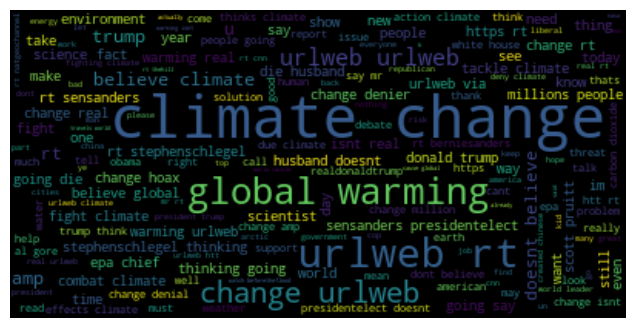

In [37]:
wordcloud = WordCloud()
tweet_cloud = wordcloud.generate(text)
plt.figure( figsize=(9,4))
plt.imshow(tweet_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Climate change and Global warming are the two most tweeted words in our data

2. Top 20 words in the tweets cleaned data

In [38]:
freq_dict = {}
words = text.split(" ")
for word in words:
    if word != " " and word !="":
        if word not in freq_dict:
            freq_dict[word] = 1
        else:
            freq_dict[word] += 1

In [39]:
sorted_freq_dict = sorted(freq_dict.items(), key=lambda x:x[1], reverse=True)[:20]
top_10_words = dict(sorted_freq_dict)

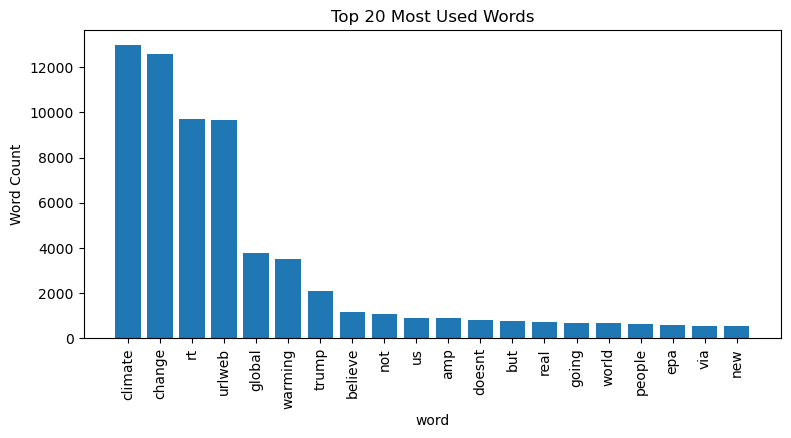

In [40]:
x_labels = list(top_10_words.keys())
values = list(top_10_words.values())

# Create the figure and axes
fig, ax = plt.subplots(figsize=(9,4))

# Plot the data
ax.bar(x_labels, values)

# Customize the plot
ax.set_xlabel('word')
ax.set_ylabel('Word Count')
ax.set_title('Top 20 Most Used Words')

# Rotate the x-labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()

The top of words used
- 1. Climate
- 2. Change
- 3. rt
- 4. urlweb
- 5. Global
- 6. Warming
- 7. trump
- 8. believe
- 9. not
- 10. us


C. The most used words of the anti climate change

In [41]:
#creating class subsets for the datase
df_anti = df_train.copy()[df_train['sentiment'] == -1]
df_neutral = df_train.copy()[df_train['sentiment'] == 0]
df_pro = df_train.copy()[df_train['sentiment'] == 1]
df_news = df_train.copy()[df_train['sentiment'] == 2]

In [42]:

text = " ".join(i for i in df_anti["CleanMessage"])
text = str(text)

In [43]:
freq_dict = {}
words = text.split(" ")
for word in words:
    if word != " " and word !="":
        if word not in freq_dict:
            freq_dict[word] = 1
        else:
            freq_dict[word] += 1

In [44]:
sorted_freq_dict = sorted(freq_dict.items(), key=lambda x:x[1], reverse=True)[:20]
top_10_words = dict(sorted_freq_dict)

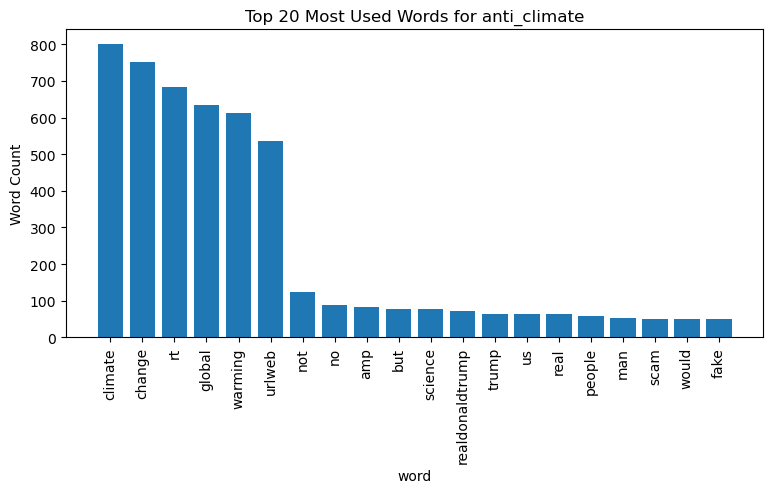

In [45]:
x_labels = list(top_10_words.keys())
values = list(top_10_words.values())

# Create the figure and axes
fig, ax = plt.subplots(figsize=(9,4))

# Plot the data
ax.bar(x_labels, values)

# Customize the plot
ax.set_xlabel('word')
ax.set_ylabel('Word Count')
ax.set_title('Top 20 Most Used Words for anti_climate')

# Rotate the x-labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()

The top of words used for anti
- 1. Climate
- 2. Change
- 3. rt
- 4. Global
- 5. Warming
- 6. urlweb
- 7. not
- 8. no
- 9. Global
- 10. Warming
- 11. trump
- 12. believe
- 13. not
- 14. us
- 15. real
- 16. People
- 17. man
- 18. scam
- 19. would
- 20. fake 


D. The most used words of the anti climate change

In [46]:
text = " ".join(i for i in df_pro["CleanMessage"])
text = str(text)

In [47]:
freq_dict = {}
words = text.split(" ")
for word in words:
    if word != " " and word !="":
        if word not in freq_dict:
            freq_dict[word] = 1
        else:
            freq_dict[word] += 1


In [48]:
sorted_freq_dict = sorted(freq_dict.items(), key=lambda x:x[1], reverse=True)[:20]
top_20_words = dict(sorted_freq_dict)

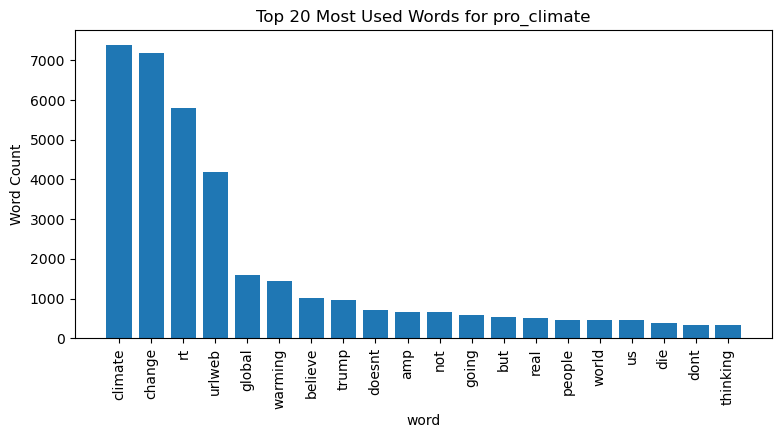

In [49]:
x_labels = list(top_20_words.keys())
values = list(top_20_words.values())

# Create the figure and axes
fig, ax = plt.subplots(figsize=(9,4))

# Plot the data
ax.bar(x_labels, values)

# Customize the plot
ax.set_xlabel('word')
ax.set_ylabel('Word Count')
ax.set_title('Top 20 Most Used Words for pro_climate')

# Rotate the x-labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()

The top of words used for pro
- 1. Climate
- 2. Change
- 3. rt
- 4. urlweb
- 5. Global
- 6. Warming
- 7. believe
- 8. trump
- 9. doesnt
- 10. amp
- 11. not
- 12. going
- 13. but
- 14. real
- 15. people
- 16. real
- 17. us
- 18. die
- 19. dont
- 20. thinking


Cleaning also included:
- Tokenization
- Stemming
- Lemmatization

### 5.2.5 Applying Tokenization

A tokeniser divides text into a sequence of tokens, which roughly correspond to "words"

In [50]:
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
tokeniser = TreebankWordTokenizer()
df_train['tokens'] = df_train['CleanMessage'].apply(tokeniser.tokenize)

5.2.6 Applying stemming

Stemming is the process of transforming to the root word. It uses an algorithm that removes common word-endings from English words, such as “ly,” “es,” “ed,” and “s.”

In [51]:
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data



In [52]:
df_train['CleanMessage']= df_train['CleanMessage'].apply(lambda x: stemming_on_text(x))

5.2.7 Applying lemmatizer

Lemmatizing is the process of grouping words of similar meaning together. So, your root stem, meaning the word you end up with, is not something you can just look up in a dictionary, but you can look up a lemma.

In [53]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data



In [54]:
df_train['CleanMessage'] = df_train['CleanMessage'].apply(lambda x: lemmatizer_on_text(x))

## 5.3 Text Feature extraction

Text feature extraction is the process of transforming what is essentially a list of words into a feature set that is usable by a classifier. The NLTK classifiers expect dict style feature sets, so we must therefore transform our text into a dict

We added the following features to modify our data and for more insights:
- Bag of words
- TFIDVectorizer

Bag of words

The Bag of Words model is the simplest method; it constructs a word presence feature set from all the words in the text, indicating the number of times each word has appeared.

In [55]:
def bag_of_words_count(words, word_dict={}):
    """ this function takes in a list of words and returns a dictionary 
        with each word as a key, and the value represents the number of 
        times that word appeared"""
    for word in words:
        if word in word_dict.keys():
            word_dict[word] += 1
        else:
            word_dict[word] = 1
    return word_dict

With bag of words we additionally looked for the following:
- unique sentiments
- total words
- word frequency
- rare words


A. The 4 unique sentimnts

In [56]:
unique_sentiment = list(df_train["sentiment"].unique())
print(unique_sentiment)

[1, 2, 0, -1]


B. There are 195215 words in our data

In [57]:
personality = {}
for pp in unique_sentiment:
    df = df_train.groupby('sentiment')
    personality[pp] = {}
    for row in df.get_group(pp)['tokens']:
        personality[pp] = bag_of_words_count(row, personality[pp])       

In [58]:
all_words = set()
for pp in unique_sentiment:
    for word in personality[pp]:
        all_words.add(word)

In [59]:
personality['all'] = {}
for pp in unique_sentiment:    
    for word in all_words:
        if word in personality[pp].keys():
            if word in personality['all']:
                personality['all'][word] += personality[pp][word]
            else:
                personality['all'][word] = personality[pp][word]

In [60]:
total_words = sum([v for v in personality['all'].values()])
total_words

195215

C. The bar graph shows the word frequency in our data
- 1 word appears 14 000 in our data

Text(0.5, 0, 'word frequency')

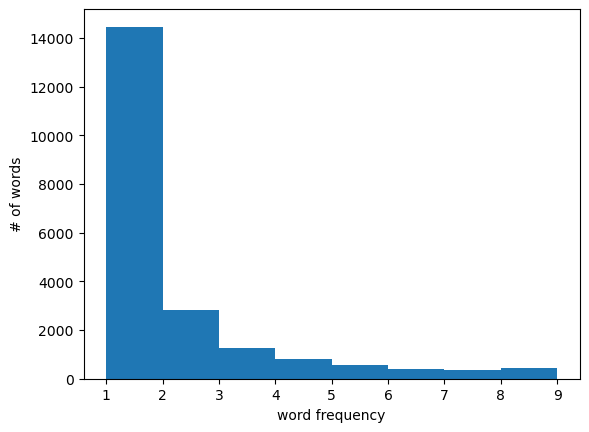

In [61]:
all_words = plt.hist([v for v in personality['all'].values() if v < 10],bins=8)
plt.ylabel("# of words")
plt.xlabel("word frequency")

In [62]:
len([v for v in personality['all'].values() if v == 1])

14467

In [63]:
len([v for v in personality['all'].values() if v == 10])

165

Looking for rare words in our data
- that occurs once
- that occurs less than 10 times
- that occur 100 times

In [64]:
rare_words = [k for k, v in personality['all'].items() if v==1] 
print(rare_words[:100])

['stimulate', 'bvweir', 'detergentsetc', 'ar', 'ottawa', 'balling', 'biome', 'opejoe', 'politicussarah', 'followoller', 'ministry', 'sum', 'navbhangu', 'completeitcuomo', 'theyknewthen', 'environmentclimate', 'planetenausicaa', 'liberties', 'dupuda', 'recessions', 'randsimberg', 'anchored', 'fe', 'vocab', 'sfbayneedsepa', 'docbrown', 'saudis', 'richardtuffin', 'rockstrom', 'rene', 'jimwitkins', 'nationalprks', 'compete', 'chem', 'steinberg', 'overload', 'punitrenjen', 'haleyylamb', 'reclaiming', 'mill', 'writesasheville', 'megancarpentier', 'tweeep', 'codytownsend', 'uomscicomm', 'betsydevosed', 'advertising', 'koenders', 'spores', 'maxine', 'rachelbkr', 'thts', 'explanationclimate', 'yesterdayin', 'mafucka', 'snowfree', 'lmk', 'citizensfedup', 'decolonising', 'owe', 'wizardbird', 'carbonate', 'cccman', 'cifaction', 'kylejmcfadden', 'oceanclimate', 'epitome', 'paleblueeyes', 'headco', 'pthompson', 'morrisseyhelena', 'kimmismiles', 'goodnewsfriday', 'mammon', 'opinio', 'demigod', 'johng

In [65]:
# Words that appear more than 10 times 
com_words = [k for k, v in personality['all'].items() if v>10] 
print(rare_words[:100])

['stimulate', 'bvweir', 'detergentsetc', 'ar', 'ottawa', 'balling', 'biome', 'opejoe', 'politicussarah', 'followoller', 'ministry', 'sum', 'navbhangu', 'completeitcuomo', 'theyknewthen', 'environmentclimate', 'planetenausicaa', 'liberties', 'dupuda', 'recessions', 'randsimberg', 'anchored', 'fe', 'vocab', 'sfbayneedsepa', 'docbrown', 'saudis', 'richardtuffin', 'rockstrom', 'rene', 'jimwitkins', 'nationalprks', 'compete', 'chem', 'steinberg', 'overload', 'punitrenjen', 'haleyylamb', 'reclaiming', 'mill', 'writesasheville', 'megancarpentier', 'tweeep', 'codytownsend', 'uomscicomm', 'betsydevosed', 'advertising', 'koenders', 'spores', 'maxine', 'rachelbkr', 'thts', 'explanationclimate', 'yesterdayin', 'mafucka', 'snowfree', 'lmk', 'citizensfedup', 'decolonising', 'owe', 'wizardbird', 'carbonate', 'cccman', 'cifaction', 'kylejmcfadden', 'oceanclimate', 'epitome', 'paleblueeyes', 'headco', 'pthompson', 'morrisseyhelena', 'kimmismiles', 'goodnewsfriday', 'mammon', 'opinio', 'demigod', 'johng

In [66]:
# how many words appear more than 10 times?
print(len([v for v in personality['all'].values() if v >= 10]))
# how many words of the total does that account for?
occurs_more_than_10_times = sum([v for v in personality['all'].values() if v >= 10])
print(occurs_more_than_10_times)

2302
156759


In [67]:
max_count = 10
remaining_word_index = [k for k, v in personality['all'].items() if v > max_count]
remaining_word_index

['hiatus',
 'aren',
 'catastrophic',
 'na',
 'buy',
 'diet',
 'sustainable',
 'target',
 'block',
 'hurricane',
 'santa',
 'move',
 'john',
 'critical',
 'actonclimate',
 'beef',
 'tackle',
 'citizens',
 'politics',
 'humans',
 'accept',
 'voter',
 'cf',
 'senior',
 'explore',
 'resistance',
 'id',
 'director',
 'ignore',
 'open',
 'ch',
 'roguenasa',
 'oklahoma',
 'preventing',
 'ne',
 'likely',
 'saying',
 'voting',
 'dangers',
 'threaten',
 'cnbc',
 'cracks',
 'bans',
 'climatecounts',
 'suggests',
 'claims',
 'fucking',
 'hi',
 'environmentalist',
 'huffpostgreen',
 'feel',
 'easy',
 'evidence',
 'white',
 'dems',
 'firms',
 'fighting',
 'disaster',
 'individuals',
 'interest',
 'none',
 'oceans',
 'destroying',
 'europe',
 'beat',
 'hours',
 'diabetes',
 'skepticism',
 'attacks',
 'wrong',
 'ways',
 'get',
 'live',
 'insideclimate',
 'pause',
 'post',
 'isn',
 'decision',
 'rather',
 'australia',
 'today',
 'solutions',
 'david',
 'cant',
 'lgbtq',
 'life',
 'current',
 'enjoying'

Term Frequency – Inverse Document Frequency (TF – IDF)
- In this section we only defined Tfidf Vecorizer. We used it in our modelling

In [68]:
obj = TfidfVectorizer()
corpus = df_train["message"]
X = obj.fit_transform(corpus)


<a id="six"></a>

# 6. Modelling

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

| ⚡ Description: Modelling ⚡                                                                                                                |
| :------------------------------------------------------------------------------------------------------------------------------------------ |
| In this section, we created 6 classifiers that are able to accurately predict the twitter sentiments. |

---


### Pre processing

The line X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=50) is splitting the data into training and validation sets.

X and y are the feature matrix and target variable, respectively. X contains the features we use to make predictions, and y contains the corresponding target values (in this case, sentiment).

train_test_split() is a function provided by scikit-learn (a popular machine learning library) that is used to split a dataset into training and validation subsets.

The function takes the following arguments:

X: The feature matrix (independent variables). y: The target variable (dependent variable). test_size: This parameter specifies the proportion of the data that should be used for the validation set. In this case, it's set to 0.2, meaning 20% of the data will be used for validation, and the remaining 80% for training. random_state: This is a seed for the random number generator used in the data splitting process. Setting this to a specific value (e.g., 42) ensures that the split is reproducible.

train_test_split() returns four sets of data:

X_train: This contains the feature data for the training set. X_val: This contains the feature data for the validation set. y_train: This contains the target data for the training set. y_val: This contains the target data for the validation set. By splitting the data into training and validation sets, you can train your machine learning model on a portion of the data (X_train and y_train) and evaluate its performance on another portion that it hasn't seen during training (X_val and y_val). This allows us to estimate how well your model is likely to perform on unseen data (seen in Model Performance section).

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
df_train.head()

,sentiment,message,length,CleanMessage,tokens
0,1,PolySciMajor EPA chief doesn't think carbon di...,140,polyscimajor epa chief doesnt think carbon dio...,"[polyscimajor, epa, chief, doesnt, think, carb..."
1,1,It's not like we lack evidence of anthropogeni...,62,not like lack evidence anthropogenic global wa...,"[not, like, lack, evidence, anthropogenic, glo..."
2,2,RT @RawStory: Researchers say we have three ye...,140,rt rawstory researchers say three years act cl...,"[rt, rawstory, researchers, say, three, years,..."
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,99,todayinmaker wired pivotal year war climate ch...,"[todayinmaker, wired, pivotal, year, war, clim..."
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",122,rt soynoviodetodas racist sexist climate chang...,"[rt, soynoviodetodas, racist, sexist, climate,..."


In [71]:
#Splitting features and target variables
X = df_train['CleanMessage'] #X is the features of the cleaned tweets
y = df_train['sentiment']    #Y is the target variable which is the train sentiment

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) #Splitting train set into training and testing data
#Print out the shape of the training set and the testing set


C:\Users\percy\AppData\Local\Temp\ipykernel_31336\4220198361.py:18: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.set_xlim(-0.5, len(steps), 1)


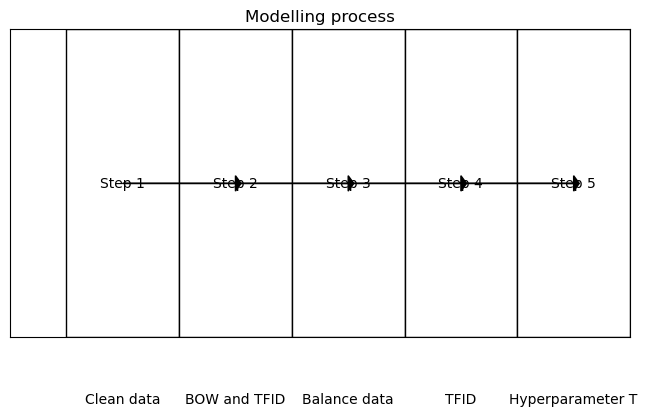

In [72]:

# Create a step-by-step flow diagram
steps = ['Step 1', 'Step 2', 'Step 3', 'Step 4', 'Step 5']
actions = ['Clean data', 'BOW and TFID', 'Balance data', 'TFID', 'Hyperparameter T']

fig, ax = plt.subplots(figsize=(8, 4))

# Draw rectangles for each step
for i, step in enumerate(steps):
    rect = mpatches.Rectangle((i, 0), 1, 1, ec='black', fc='White')
    ax.add_patch(rect)
    ax.text(i + 0.5, 0.5, step, ha='center', va='center', color='black')

# Draw arrows between steps
for i in range(len(steps) - 1):
    ax.arrow(i + 0.5, 0.5, 1, 0, head_width=0.05, head_length=0.05, fc='black', ec='black')

# Set axis limits and remove ticks
ax.set_xlim(-0.5, len(steps), 1)
ax.set_ylim(0, 1)
ax.set_xticks([])
ax.set_yticks([])

# Add action labels below steps
for i, action in enumerate(actions):
    ax.text(i + 0.5, -0.2, action, ha='center', va='center', color='black')

plt.title('Modelling process')
plt.show()

## 6.1 Modeling - unbalanced data

In building a model to classify twitter sentiments for climate change we used the following classifiers on clean data:
-  Logistic Regression
- Linear & non linear SVC
- Decision Trees
- Naive Bayes
- KNN

The modelling was done using the bag words and Term Frequency – Inverse Document Frequency (TF – IDF)

In [73]:
cf = CountVectorizer() 

In [74]:
tfidf = TfidfVectorizer()


Scaling
- Scalling reduced the perfomance of our models so we used unscaled data

### 6.1.1 Bag of words


#### A. Logistic Regression 
it makes use of a common S-shaped curve known as the logistic function. This curve is commonly known as a sigmoid. It solves the problem for the following reasons:

-  It squeezes the range of output values to exist only between 0 and 1.
-  It has a point of inflection, which can be used to separate the feature space into two distinct areas (one for each class).
-  It has shallow gradients at both its top and bottom, which can be mapped to zeroes or ones respectively with little ambiguity.

In [75]:
lr = LogisticRegression() #Call logistic regression model and assign variable 'model'

In [76]:
lr1 = Pipeline([('cf', cf), ('clf', lr)]) #Create a pipeline with the logistic model and bow vectorizer

In [77]:
import time
start_time = time.time()
lr1.fit(X_train, y_train) #Fit the training set

c:\Users\percy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cf', CountVectorizer()), ('clf', LogisticRegression())])

In [78]:
y_pred= lr1.predict(X_test) #Fit the test set

In [79]:
training_time = time.time() - start_time

In [80]:
print(f"Training time: {training_time:.2f} seconds")
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print f1 score
print(classification_report(y_test, y_pred)) #Print classification report

Training time: 2.61 seconds
f1_score 0.7399161081756703
              precision    recall  f1-score   support

          -1       0.74      0.42      0.54       278
           0       0.55      0.50      0.52       425
           1       0.78      0.85      0.81      1755
           2       0.76      0.77      0.77       706

    accuracy                           0.75      3164
   macro avg       0.71      0.64      0.66      3164
weighted avg       0.74      0.75      0.74      3164



-  For the logistic regression precision, recall and f1-score values for the pro and news class are higher.Most tweets falls under pro class and news so the model gets better at classifiying them because it has more obsevations of them.

- The neutral and negative class are lower.


#### B Linear SVM 

Separate points using a  (p−1)
  dimensional hyperplane. This means that the SVM will construct a decision boundary such that points on the left are assigned a label of  A
  and points on the right are assigned a label of  B
 . When finding this separating hyperplane we wish to maximise the distance of the nearest points to the hyperplane. The technical term for this is maximum separating hyperplane. The data points which dictate where the separating hyperplane goes are called support vectors. 

In [81]:
#Create a pipeline and make predictions of the bag of words using linearSVC


LSV1= Pipeline([('cf', cf),('clf',  LinearSVC())]) #Create a pipeline with the bag or words features and the linearSVC


In [82]:
LSV1.fit(X_train, y_train) #Fit the training data to the pipeline

c:\Users\percy\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('cf', CountVectorizer()), ('clf', LinearSVC())])

In [83]:
y_pred = LSV1.predict(X_test) #Make predictions with the test data

In [84]:
training_time = time.time() - start_time

In [85]:
print(f"Training time: {training_time:.2f} seconds")
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print out the f1 score
print(classification_report(y_test, y_pred)) #Print out the classification repor

Training time: 4.57 seconds
f1_score 0.7255578119167845
              precision    recall  f1-score   support

          -1       0.64      0.50      0.56       278
           0       0.51      0.48      0.49       425
           1       0.79      0.80      0.80      1755
           2       0.72      0.78      0.75       706

    accuracy                           0.73      3164
   macro avg       0.67      0.64      0.65      3164
weighted avg       0.72      0.73      0.73      3164



- Similarly to Logistic regression, The LSVC precision, recall and f1-score values for the pro and news class are higher.Most tweets falls under pro class and news so the model gets better at classifiying them because it has more evidence of them.

- The neutral and negative class are lower.

- The perfomance of LSVC is slightly lower that Logisctic regression


#### C. non Linear SVC

In [86]:
#Create a pipeline and make predictions of the bag of words using SVC
nLSVC1= Pipeline([('cf', cf),('clf',  SVC())]) #Create a pipeline with the bag or words features and theSVC



In [87]:
start_time = time.time()
nLSVC1.fit(X_train, y_train) #Fit the training data to the pipeline


Pipeline(steps=[('cf', CountVectorizer()), ('clf', SVC())])

In [88]:
y_pred = nLSVC1.predict(X_test) #Make predictions with the test data

In [89]:
training_time = time.time() - start_time

In [90]:
print(f"Training time: {training_time:.2f} seconds")
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print out the f1 score
print(classification_report(y_test, y_pred)) #Print out the classification repor

Training time: 28.48 seconds
f1_score 0.7145464632688455
              precision    recall  f1-score   support

          -1       0.88      0.23      0.37       278
           0       0.65      0.39      0.49       425
           1       0.74      0.88      0.80      1755
           2       0.75      0.78      0.76       706

    accuracy                           0.74      3164
   macro avg       0.75      0.57      0.61      3164
weighted avg       0.74      0.74      0.71      3164



- Similarly to Linear SVC, The non LSVC precision, recall and f1-score values for the pro and news class are higher.Most tweets falls under pro class and news so the model gets better at classifiying them because it has more evidence of them.

- The neutral and negative class are lower.

- The perfomance of non LSVC is slightly lower that Linear SVC.


#### D Decision Trees 

A decision tree is a decision support tool that uses a tree-like graph or model of decisions and their possible consequences. It is one way to display an algorithm that only contains conditional control statements.

Decision trees are extremely intuitive ways to classify objects or predict continuous values: you simply ask a series of questions designed to zero-in on the classification/prediction.

In [91]:
DT1= Pipeline([('cf', cf),('clf',  DecisionTreeClassifier(random_state=42))]) #Create a pipeline with the bag or words features and the decision trees

In [92]:
DT1.fit(X_train, y_train) #Fit the training data to the pipeline

Pipeline(steps=[('cf', CountVectorizer()),
                ('clf', DecisionTreeClassifier(random_state=42))])

In [93]:
y_pred = DT1.predict(X_test) #Make predictions with the test data

In [94]:
training_time = time.time() - start_time

In [95]:
print(f"Training time: {training_time:.2f} seconds")
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print out the f1 score
print(classification_report(y_test, y_pred)) #Print out the classification repor

Training time: 37.07 seconds
f1_score 0.6557853430510712
              precision    recall  f1-score   support

          -1       0.50      0.33      0.40       278
           0       0.43      0.45      0.44       425
           1       0.74      0.74      0.74      1755
           2       0.64      0.73      0.68       706

    accuracy                           0.66      3164
   macro avg       0.58      0.56      0.56      3164
weighted avg       0.66      0.66      0.66      3164



 Similarly to Logistic regression & SVC models, The decision Trees model precision, recall and f1-score values for the pro and news class are higher.

- The neutral and negative class are lower.

- The perfomance of Decision Trees is lower that Logisctic regression and SVC models

#### E. NAIVE BAYES (Multinominal)

Naive Bayes is a classification algorithm that uses the principle of Bayes theorem to make classifications.The assumption is Naive because it often does not hold. The assumption of independence implies that the model assumes that there is zero correlation among the features. Hence, the joint probability distribution  P(X,Y)
  can be obtained from the marginal probability distributions  P(X)
  and  P(Y)
  simply by multiplication. 

In [96]:
nb =  MultinomialNB()


In [97]:
nb1= Pipeline([('cf', cf),('clf',  nb)]) #Create a pipeline with the bag or words features and the naive bayes

In [98]:
nb1.fit(X_train, y_train) #Fit the training data to the pipeline

Pipeline(steps=[('cf', CountVectorizer()), ('clf', MultinomialNB())])

In [99]:
Training_time = time.time() - start_time

In [100]:
y_pred = nb1.predict(X_test) #Make predictions with the test data

In [101]:
def train_model():
    nb1.fit(X_train, y_train)

# Measure the training time using timeit
execution_time = timeit.timeit(train_model, number=1)


In [102]:
print(f"execution time: {execution_time:.2f} seconds")
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print the f1-score
print(classification_report(y_test, y_pred)) #Print the classification report
               

execution time: 0.23 seconds
f1_score 0.6919677002321032
              precision    recall  f1-score   support

          -1       0.92      0.21      0.35       278
           0       0.72      0.24      0.36       425
           1       0.72      0.91      0.80      1755
           2       0.74      0.76      0.75       706

    accuracy                           0.73      3164
   macro avg       0.77      0.53      0.57      3164
weighted avg       0.74      0.73      0.69      3164



 Similarly to Logistic regression SVC nad Decision Trees, The Naive Bayes model precision, recall and f1-score values for the pro and news class are higher.
- The neutral and negative class are lower.

- The F1_score of Naive Bayes is lower that Logisctic regression and sVC models. But is higher than Decision Trees

#### F. K Nearest Neighbours

In principle, this algorithm works by assigning the majority class of the N closest neighbors to the current data point. As such, absolutely no training is required for the algorithm! All we do is choose K (i.e. the number of neighbors to consider), choose a distance function to calculate proximity and we're good to go.

In [103]:
knn = KNeighborsClassifier(10)      

In [104]:
Knn1= Pipeline([('cf', cf),('cnb', knn)]) #Create a pipeline with the bag or words features and the nearest neighbours

In [105]:
Knn1.fit(X_train, y_train) #Fit the training data to the pipeline

Pipeline(steps=[('cf', CountVectorizer()),
                ('cnb', KNeighborsClassifier(n_neighbors=10))])

In [106]:
def train_model():
    Knn1.fit(X_train, y_train)

In [107]:
y_pred = Knn1.predict(X_test) #Make predictions with the test data

In [108]:
# Measure the training time using timeit
execution_time = timeit.timeit(train_model, number=1)

In [109]:
print(f"execution time: {execution_time:.2f} seconds")
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print the f1-score
print(classification_report(y_test, y_pred)) #Print the classification report

execution time: 0.26 seconds
f1_score 0.41915178327037267
              precision    recall  f1-score   support

          -1       0.85      0.08      0.15       278
           0       0.19      0.85      0.31       425
           1       0.68      0.38      0.48      1755
           2       0.80      0.29      0.43       706

    accuracy                           0.40      3164
   macro avg       0.63      0.40      0.34      3164
weighted avg       0.66      0.40      0.42      3164



Similarly to all the models, The Key Nearest Neighbour model precision, recall and f1-score values for the pro and news class are higher.
- The neutral and negative class are lower.
- The Key neighbours precision, recall and f1-score values for all the sentiments is lower than 50%  making the least perfoming model

### 6.1.2. Modelling TF – IDF

#### A. Logistic Regression

In [110]:
model = LogisticRegression() #Call logistic regression model and assign variable 'model'

In [111]:
Lr2 = Pipeline([('tfidf', tfidf), ('clf', model)]) #Create a pipeline with the logistic model and tf-idf vectorizer

In [112]:
Lr2.fit(X_train, y_train) #Fit the training set

c:\Users\percy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())])

In [113]:
y_pred= Lr2.predict(X_test) #Fit the test set

In [114]:
def train_model():
   Lr2.fit(X_train, y_train)
# Measure the training time using timeit
execution_time = timeit.timeit(train_model, number=1)


c:\Users\percy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [115]:
print(f"execution time: {execution_time:.2f} seconds")
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print f1 score
print(classification_report(y_test, y_pred)) #Print classification report

execution time: 1.82 seconds
f1_score 0.7183158074771773
              precision    recall  f1-score   support

          -1       0.81      0.30      0.44       278
           0       0.64      0.35      0.45       425
           1       0.74      0.90      0.81      1755
           2       0.76      0.76      0.76       706

    accuracy                           0.74      3164
   macro avg       0.74      0.58      0.61      3164
weighted avg       0.74      0.74      0.72      3164



 Similarly to Logistic regression bag of words, The TF – IDF model precision, recall and f1-score values for the pro and news class are higher.Most tweets falls under pro class and news so the model gets better at classifiying them because it has more observations of them.

- The neutral and negative class are lower.

- The perfomance of TF – IDF is lower that Logisctic regression bag words

#### B.  Linear SVC

In [116]:
## create a pipeline and fit it with a Linear Support Vector Classifier
LSV2 = Pipeline([('tfidf', tfidf), ('clf', LinearSVC())]) #Create a pipeline with the tdidf


In [117]:
LSV2.fit(X_train, y_train) #Fit the model

c:\Users\percy\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [118]:
y_pred = LSV2.predict(X_test) #Make predictions and assign the variable 'y_pred'

In [119]:
def train_model():
  LSV2.fit(X_train, y_train)
# Measure the training time using timeit
execution_time = timeit.timeit(train_model, number=1)

c:\Users\percy\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [120]:
print(f"execution time: {execution_time:.2f} seconds")
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print the f1-score
print(classification_report(y_test, y_pred)) #Print the classification report


execution time: 0.39 seconds
f1_score 0.738302597268202
              precision    recall  f1-score   support

          -1       0.71      0.47      0.57       278
           0       0.58      0.42      0.49       425
           1       0.78      0.86      0.82      1755
           2       0.74      0.78      0.76       706

    accuracy                           0.75      3164
   macro avg       0.70      0.63      0.66      3164
weighted avg       0.74      0.75      0.74      3164



Similarly to LVC bag of words, The TF – IDF model precision, recall and f1-score values for the pro and news class are higher.Most tweets falls under pro class and news so the model gets better at classifiying them.

- The neutral and negative class are lower.

- The perfomance of TF – IDF is higher that LVC bag words

#### C.  non Linear SVC

In [121]:
## create a pipeline and fit it with a Support Vector Classifier
nLSVC2 = Pipeline([('tfidf', tfidf), ('clf', SVC())]) #Create a pipeline with the tdidf


In [122]:
nLSVC2.fit(X_train, y_train) #Fit the model

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', SVC())])

In [123]:
y_pred = nLSVC2.predict(X_test) #Make predictions and assign the variable 'y_pred'

In [124]:
def train_model():
  nLSVC2.fit(X_train, y_train)
execution_time = timeit.timeit(train_model, number=1)

In [125]:
print(f"execution time: {execution_time:.2f} seconds")
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print the f1-score
print(classification_report(y_test, y_pred)) #Print the classification report

execution time: 31.56 seconds
f1_score 0.7163282254416103
              precision    recall  f1-score   support

          -1       0.89      0.27      0.41       278
           0       0.77      0.31      0.44       425
           1       0.72      0.92      0.81      1755
           2       0.79      0.75      0.77       706

    accuracy                           0.74      3164
   macro avg       0.79      0.56      0.61      3164
weighted avg       0.76      0.74      0.72      3164



Similarly to non LVC bag of words, The TF – IDF model precision, recall and f1-score values for the pro and news class are higher.Most tweets falls under pro class and news so the model gets better at classifiying them because it has more evidence of them.

- The neutral and negative class are lower.

- The perfomance of TF – IDF is higher that non LVC bag words

#### D. Decision Trees

In [126]:
## create a pipeline and fit it with a decision trees
DT =  DecisionTreeClassifier(random_state=42) #Call Decision tree and assign the variable 'classifier'


In [127]:
DT2 = Pipeline([('tfidf', tfidf), ('clf', DT)]) #Create a pipeline with the tdidf

In [128]:
DT2.fit(X_train, y_train) #Fit the model

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', DecisionTreeClassifier(random_state=42))])

In [129]:
y_pred = DT2.predict(X_test) #Make predictions and assign the variable 'y_pred'


In [130]:
def train_model():
  DT2.fit(X_train, y_train)
execution_time = timeit.timeit(train_model, number=1)

In [131]:
print(f"execution time: {execution_time:.2f} seconds")
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print the f1-score
print(classification_report(y_test, y_pred)) #Print the classification report

execution time: 6.84 seconds
f1_score 0.6109372641767907
              precision    recall  f1-score   support

          -1       0.43      0.23      0.30       278
           0       0.39      0.39      0.39       425
           1       0.69      0.73      0.71      1755
           2       0.60      0.64      0.62       706

    accuracy                           0.62      3164
   macro avg       0.53      0.50      0.50      3164
weighted avg       0.61      0.62      0.61      3164



Similarly to Decision Trees bag of words, The TF – IDF model precision, recall and f1-score values for the pro and news class are higher.Most tweets falls under pro class and news so the model gets better at classifiying them because it has more evidence of them.

- The neutral and negative class are lower.

- The perfomance of TF – IDF is slighly lower Decison Trees bag words

#### E. Naive Bayes

In [132]:
## create a pipeline and fit it with a naive bayes Classifier
nb = MultinomialNB() #Call naive bayes and assign the variable 'classifier'


In [133]:
nb2 = Pipeline([('tfidf', tfidf), ('clf', nb)]) #Create a pipeline with the tdidf

In [134]:
nb2.fit(X_train, y_train) #Fit the model

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [135]:
y_pred = nb2.predict(X_test) #Make predictions and assign the variable 'y_pred'

In [136]:
def train_model():
  nb2.fit(X_train, y_train)
execution_time = timeit.timeit(train_model, number=1)

In [137]:
print(f"execution time: {execution_time:.2f} seconds")
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print the f1-score
print(classification_report(y_test, y_pred)) #Print the classification report

execution time: 0.22 seconds
f1_score 0.5767661459304475
              precision    recall  f1-score   support

          -1       1.00      0.00      0.01       278
           0       1.00      0.06      0.12       425
           1       0.62      0.99      0.76      1755
           2       0.90      0.46      0.61       706

    accuracy                           0.66      3164
   macro avg       0.88      0.38      0.37      3164
weighted avg       0.77      0.66      0.58      3164



The TF – IDF model precision, recall and f1-score values for the pro and news class are higher.Most tweets falls under pro class and news so the model gets better at classifiying them because it has more evidence of them.

- The neutral and negative class are lower.

- The perfomance of TF – IDF is the same as Naive Bayes bag words

#### f. K Nearest Neighbour

In [138]:
## create a pipeline and fit it with a nearest neighbour features
knn =  KNeighborsClassifier(50) #Call LinearSVC and assign the variable 'classifier'


In [139]:
knn2 = Pipeline([('tfidf', tfidf), ('clf', knn)]) #Create a pipeline with the tdidf

In [140]:
knn2.fit(X_train, y_train) #Fit the model

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', KNeighborsClassifier(n_neighbors=50))])

In [141]:
y_pred = knn2.predict(X_test) #Make predictions and assign the variable 'y_pred'

In [142]:
def train_model():
 knn2.fit(X_train, y_train)
execution_time = timeit.timeit(train_model, number=1)

In [143]:
print(f"execution time: {execution_time:.2f} seconds")
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print the f1-score
print(classification_report(y_test, y_pred)) #Print the classification report

execution time: 0.23 seconds
f1_score 0.617867034185953
              precision    recall  f1-score   support

          -1       0.71      0.14      0.24       278
           0       0.63      0.13      0.22       425
           1       0.67      0.88      0.76      1755
           2       0.66      0.65      0.65       706

    accuracy                           0.66      3164
   macro avg       0.67      0.45      0.47      3164
weighted avg       0.66      0.66      0.62      3164



The TF – IDF model precision, recall and f1-score values for the pro and news class are higher.Most tweets falls under pro class and news so the model gets better at classifiying them because it has more evidence of them.

- The neutral and negative class are lower.

- The perfomance of TF – IDF is higher Naive Bayes bag words

## 6.2 Dealing with Imbalances

Class imbalance occurs when the number of observations across different class labels are unevenly distributed. In training our classification model, it is preferable for all classes to have a relatively even split of observations. 

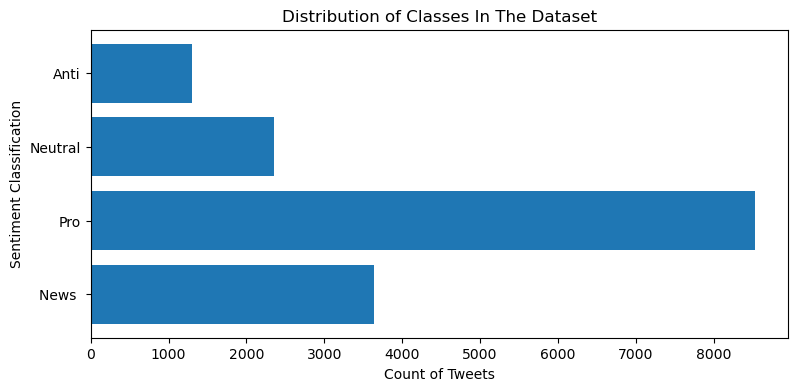

In [144]:
senti_counts = df_train["sentiment"].value_counts()
news = senti_counts[2] 
pro = senti_counts[1]   
neutral = senti_counts[0]
anti = senti_counts[-1]  

plt.figure( figsize=(9,4))
plt.barh(['News ','Pro','Neutral','Anti'], [news,pro,neutral,anti]) # horizontal bar graph to compare classes of tweets.
plt.colours = ['red', 'green', 'blue', 'orange']
plt.xlabel('Count of Tweets') #X-label of the data
plt.ylabel('Sentiment Classification') #Y_label of the data 
plt.title('Distribution of Classes In The Dataset') #Give the data a title 'Dataset lables distribution'
plt.show()

Resampling
two variants of the most common method available: resampling. Put simply, resampling methods involve modifying the number of observations in each class as follows:

- Downsampling - taking a random subset of the majority class small enough to match the number of observations in the minority class.

- Upsampling - taking repeated random samples from the minority class until we have as many observations as the majority class. This grows the size of the minority class by effectively duplicating observations at random.

We used the combination of Downsampling and Upsampling method.

In [145]:
#Import the resampling module
from sklearn.utils import resample

In [146]:
df_majority = df_train.copy()[df_train['sentiment'] == 1]
df_minority1 = df_train.copy()[df_train['sentiment'] == 0]
df_minority2 = df_train.copy()[df_train['sentiment'] == 2]
df_minority3 = df_train.copy()[df_train['sentiment'] == -1]

1. Downsampling Pro tweets

In [147]:
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=5000,     # Using a benchmark of 3640
                                 random_state=123) # reproducible results

2. Upsampling the news, anti and neutral tweets

In [148]:
#Upsampling the least minority class
df_minority_up = resample(df_minority1, 
                        replace=True,    # sample without replacement
                        n_samples=5000,     # to match the second majority class
                        random_state=123) # reproducible results

In [149]:
df_minority_up1 = resample(df_minority2, 
                        replace=True,    # sample without replacement
                        n_samples=5000,     # to match the second majority class
                        random_state=123) # reproducible results


In [150]:
df_minority_up2 = resample(df_minority3, 
                        replace=True,    # sample without replacement
                        n_samples=5000,     # to match the second majority class
                        random_state=123) # reproducible results

In [151]:
# Combine minority class with downsampled majority class
df_resampled = pd.concat([df_majority_downsampled,df_minority_up,df_minority_up1, df_minority_up2])

In [152]:
# Display new class counts
df_resampled.sentiment.value_counts()

 1    5000
 0    5000
 2    5000
-1    5000
Name: sentiment, dtype: int64

In [153]:
X = df_resampled['CleanMessage']
y = df_resampled['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16000,)
(4000,)
(16000,)
(4000,)


#### A.Logical Regression

In [154]:
model = LogisticRegression() #Call logistic regression model and assign variable 'model'


In [155]:
Lr3 = Pipeline([('tfidf', tfidf), ('clf', model)]) #Create a pipeline with the logistic model and bag-of-words

In [156]:
Lr3.fit(X_train, y_train) #Fit the training set

c:\Users\percy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())])

In [157]:
y_pred= Lr3.predict(X_test) #Fit the test set

In [159]:
def train_model():
 Lr3.fit(X_train, y_train)
execution_time = timeit.timeit(train_model, number=1)

c:\Users\percy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [160]:

print(f"execution time: {execution_time:.2f} seconds")
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print f1 score
print(classification_report(y_test, y_pred)) #Print classification report

execution time: 2.17 seconds
f1_score 0.8511536753199987
              precision    recall  f1-score   support

          -1       0.91      0.94      0.92       977
           0       0.85      0.86      0.86      1024
           1       0.81      0.71      0.75       995
           2       0.84      0.91      0.87      1004

    accuracy                           0.85      4000
   macro avg       0.85      0.85      0.85      4000
weighted avg       0.85      0.85      0.85      4000



 Balancing the dataset has lead to a significant improvement in the model. The resampled dataset is performing better than the model of the original dataset. However, due to downsampling of the data, we see that the pro class f1 score and recall are significantly lower than other sentiments.

Pro class has a significantly lower f1 score now and recall score

The balance now makes it easier to make predictions on the other classes and seems to be performing much better in this regards

#### B Linear SVC 

In [161]:
LSV3= Pipeline([('cf', cf),('clf',  LinearSVC())]) #Create a pipeline with the tf_df features and the linearSVC

In [162]:
LSV3.fit(X_train, y_train) #Fit the training data to the pipeline

c:\Users\percy\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\percy\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('cf', CountVectorizer()), ('clf', LinearSVC())])

In [163]:
y_pred = LSV3.predict(X_test) #Make predictions with the test data

In [164]:
def train_model():
 LSV3.fit(X_train, y_train)
execution_time = timeit.timeit(train_model, number=1)

c:\Users\percy\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\percy\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [165]:
print(f"execution time: {execution_time:.2f} seconds")
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print out the f1 score
print(classification_report(y_test, y_pred)) #Print out the classification report

execution time: 3.33 seconds
f1_score 0.8769573796948307
              precision    recall  f1-score   support

          -1       0.93      0.98      0.95       977
           0       0.86      0.91      0.88      1024
           1       0.84      0.72      0.78       995
           2       0.88      0.91      0.90      1004

    accuracy                           0.88      4000
   macro avg       0.88      0.88      0.88      4000
weighted avg       0.88      0.88      0.88      4000



The model for linear SVC seems to be getting a high accuracy and high f1 score, which is good however it still struggles to locate the pro sentiments as good as it does the other models.

Pro sentiments and news sentiments are lower on the precisioin but news seem to have high recall and high f1 rating.

Neutral seems to be consistent accorss all predictions

Negative sentiments seem to be performing very weel, more than all the classes

#### C. non Linear SVC

In [166]:
## create a pipeline and fit it with a  Support Vector Classifier
nLSVC3 = Pipeline([('tfidf', tfidf), ('clf', SVC())]) #Add the SVC model to the pipeline


In [167]:
nLSVC3.fit(X_train, y_train) #Fit the training data

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', SVC())])

In [168]:
y_pred =nLSVC3.predict(X_test) #Make predictions to the test set and assign the variable 'y_pred'

In [169]:
def train_model():
 nLSVC3.fit(X_train, y_train)
execution_time = timeit.timeit(train_model, number=1)

In [170]:
print(f"execution time: {execution_time:.2f} seconds")
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print the f1 score
print(classification_report(y_test, y_pred)) #Print out the classification

execution time: 36.98 seconds
f1_score 0.8980849694369445
              precision    recall  f1-score   support

          -1       0.97      0.97      0.97       977
           0       0.92      0.89      0.91      1024
           1       0.83      0.81      0.82       995
           2       0.88      0.92      0.90      1004

    accuracy                           0.90      4000
   macro avg       0.90      0.90      0.90      4000
weighted avg       0.90      0.90      0.90      4000



The model for non linear SVC seems to be getting a high accuracy and high f1 score, which is good however it still struggles to locate the pro sentiments as good as it does the other models.

Pro sentiments are and news sentiments are lower on the precisioin but news seem to have high recall and high f1 rating.

Neutral seems to be consistent accorss all predictions

Negative sentiments seem to be performing very weel, more than all the classes

#### C. Decision Trees

In [171]:
DT = DecisionTreeClassifier(random_state=42)
DT3= Pipeline([('tfidf', tfidf),('cnb', DT)]) #Create a pipeline with the tf_df features and the decision tree          

In [172]:
DT3.fit(X_train, y_train) #Fit the training data to the pipeline

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('cnb', DecisionTreeClassifier(random_state=42))])

In [173]:
def train_model():
 DT3.fit(X_train, y_train)
execution_time = timeit.timeit(train_model, number=1)

In [174]:
y_pred = DT3.predict(X_test) #Make predictions with the test data

In [175]:
print(f"execution time: {execution_time:.2f} seconds")
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print the f1-score
print(classification_report(y_test, y_pred)) #Print the classification report

execution time: 6.53 seconds
f1_score 0.8227464644902972
              precision    recall  f1-score   support

          -1       0.87      0.97      0.92       977
           0       0.81      0.90      0.85      1024
           1       0.81      0.56      0.66       995
           2       0.82      0.89      0.86      1004

    accuracy                           0.83      4000
   macro avg       0.83      0.83      0.82      4000
weighted avg       0.83      0.83      0.82      4000



The model for Decision Trees is be getting a high accuracy and high f1 score, which is good however it still struggles to locate the pro sentiments as good as it does the other models.

Pro sentiments are and news sentiments are lower on the precisioin but news seem to have high recall and high f1 rating.

Neutral seems to be consistent accorss all predictions

Negative sentiments seem to be performing very well, more than all the classes

#### D. Resampled Naive Bayes

In [176]:


naive_bayes =  MultinomialNB()
nb3= Pipeline([('tfidf', tfidf),('cnb',  naive_bayes)]) #Create a pipeline with the tf_df features and the naive Bayes

In [177]:
nb3.fit(X_train, y_train) #Fit the training data to the pipeline

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('cnb', MultinomialNB())])

In [178]:
y_pred = nb3.predict(X_test) #Make predictions with the test data

In [179]:
def train_model():
 nb3.fit(X_train, y_train)
execution_time = timeit.timeit(train_model, number=1)

In [180]:
print(f"execution time: {execution_time:.2f} seconds")
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print the f1-score
print(classification_report(y_test, y_pred)) #Print the classification report

execution time: 0.33 seconds
f1_score 0.8134225130230933
              precision    recall  f1-score   support

          -1       0.80      0.96      0.87       977
           0       0.88      0.76      0.82      1024
           1       0.81      0.64      0.71       995
           2       0.79      0.92      0.85      1004

    accuracy                           0.82      4000
   macro avg       0.82      0.82      0.81      4000
weighted avg       0.82      0.82      0.81      4000



The model for Naive Bayes seems to be getting a high accuracy and high f1 score
Pro sentiments are and news sentiments are lower on the precision but news seem to have high recall and high f1 rating.

Neutral seems to be consistent accorss all predictions

Negative sentiments seem to be performing very weel, more than all the classes

#### F Resampled KNN

In [181]:
knn = KNeighborsClassifier()
knn3= Pipeline([('tfidf', tfidf),('cnkt', knn)]) #Create a pipeline with the tf_df features and the nearest neighbour

In [182]:
knn3.fit(X_train, y_train) #Fit the training data to the pipeline

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('cnkt', KNeighborsClassifier())])

In [183]:
y_pred = knn3.predict(X_test) #Make predictions with the test data

In [184]:
def train_model():
 knn3.fit(X_train, y_train)
execution_time = timeit.timeit(train_model, number=1)

In [185]:
print(f"execution time: {execution_time:.2f} seconds")
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print the f1-score
print(classification_report(y_test, y_pred)) #Print the classification r

execution time: 0.27 seconds
f1_score 0.7121183988498379
              precision    recall  f1-score   support

          -1       0.73      0.91      0.81       977
           0       0.72      0.70      0.71      1024
           1       0.71      0.47      0.56       995
           2       0.73      0.80      0.76      1004

    accuracy                           0.72      4000
   macro avg       0.72      0.72      0.71      4000
weighted avg       0.72      0.72      0.71      4000



The model for Key nearest Neighbours seems to be getting a high accuracy and high f1 score, which is good however it still struggles to locate the pro sentiments as good as it does the other models.

Pro sentiments are lower on the precision but news seem to have high recall and high f1 rating.

Neutral seems to be consistent accorss all predictions

Negative sentiments seem to be performing very weel, more than all the classes

## 6.3 Hyperparameter Tuning

The models that underwent hyperparameter tuning include:
1. Non Linear SVC
2. Linear Regression

### 6.3.1 Non Linear SVC

In [186]:
from sklearn.model_selection import GridSearchCV

In [187]:
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1]}

In [188]:
#Create a SVM model
svm_model = SVC()

# Perform grid search
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(tfidf.fit_transform(X_train), y_train)

# Print the best parameters found by grid search
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 10, 'gamma': 0.1}


In [189]:
nLSVC4 = Pipeline([('tfidf', tfidf), ('clf', SVC(kernel='rbf', C=10, gamma= 'scale'))]) #Add the SVC model to the pipeline

In [190]:
nLSVC4.fit(X_train, y_train) #Fit the training data

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', SVC(C=10))])

In [191]:
y_pred = nLSVC4.predict(X_test) #Make predictions to the test set and assign the variable 'y_pred'

In [192]:
def train_model():
 nLSVC4.fit(X_train, y_train)
execution_time = timeit.timeit(train_model, number=1)

In [193]:
print(f"execution time: {execution_time:.6f} seconds")
print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print the accuracy
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print the f1 score
print(classification_report(y_test, y_pred)) #Print out the classification

execution time: 35.266618 seconds
accuracy 0.90375
f1_score 0.9037475591721064
              precision    recall  f1-score   support

          -1       0.97      0.97      0.97       977
           0       0.92      0.90      0.91      1024
           1       0.83      0.83      0.83       995
           2       0.89      0.91      0.90      1004

    accuracy                           0.90      4000
   macro avg       0.90      0.90      0.90      4000
weighted avg       0.90      0.90      0.90      4000



The parameters improved our non Linear SVC model maaking it the best perfoming model

### 6.3.2 Logistic regression

In [194]:
# Define the parameter grid you want to search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# Create a logistic regression model
logistic_regression_model = LogisticRegression(multi_class='multinomial', max_iter=500)

# Perform grid search
grid_search = GridSearchCV(estimator=logistic_regression_model, param_grid=param_grid, cv=3, scoring='f1_macro')
grid_search.fit(tfidf.fit_transform(X_train), y_train)

# Print the best parameters found by grid search
print("Best Parameters:", grid_search.best_params_)

# Evaluate the model on the test set using the best parameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(tfidf.transform(X_test))

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

c:\Users\percy\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\percy\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\percy\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\percy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1218, in fit
    multi_clas

Best Parameters: {'C': 10, 'solver': 'newton-cg'}
Classification Report:
              precision    recall  f1-score   support

          -1       0.93      0.98      0.95       977
           0       0.88      0.91      0.89      1024
           1       0.86      0.74      0.80       995
           2       0.88      0.92      0.90      1004

    accuracy                           0.89      4000
   macro avg       0.89      0.89      0.89      4000
weighted avg       0.89      0.89      0.89      4000



With parameters from tuning Linear Regression is the second best model after non Linear SVC

### Kaggle Submission Generation

In [195]:
test_x = df_test['message'] 

In [196]:
y3_predict = nLSVC4.predict(test_x)

In [197]:
df_test['sentiment'] = y3_predict

In [198]:
df_test['sentiment'] = df_test['sentiment'].astype(int)

In [199]:
df_test[['tweetid', 'sentiment']].to_csv('NL.csv', index=False)

<a id="seven"></a>

## 7. Model Performance

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

| ⚡ Description: Model performance ⚡                                                                                                                                      |
| :------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---


In [200]:
data = {
    'Model': ['Logistical Regression', 'Linear SVC', 'non Linear SVC', 'Decision trees', 'Naive Bayes', 'Key Nearest Neighbour'],
    'imbalanced f1_score BOW': [73.99, 72.55, 71.45, 65.89, 63.17, 41.91],
    'imbalanced f1_score TF-DF': [73.53, 73.8, 71.63, 61.09, 63.17, 63.17]}

summary_table = pd.DataFrame(data)

summary_table


,Model,imbalanced f1_score BOW,imbalanced f1_score TF-DF
0,Logistical Regression,73.99,73.53
1,Linear SVC,72.55,73.80
2,non Linear SVC,71.45,71.63
3,Decision trees,65.89,61.09
4,Naive Bayes,63.17,63.17
5,Key Nearest Neighbour,41.91,63.17


The TF_df models generally performs better than bag of words models except for Decision Trees. Naive Bayes perfromance is the same for both

In [201]:
data = {'Model': ['Logistical Regression', 'Linear SVC','non Linear SVC', 'Decision trees', 'Naive Bayes', 'Key Nearest Neighbour'],
    'balanced time': [1.86, 4.70, 42.57, 5.11, 0.32, 0.32],
    'balanced f1_score': [89.27, 88.47, 90.73, 50.63, 82.53, 66.65]}



summary_table = pd.DataFrame(data)

summary_table


,Model,balanced time,balanced f1_score
0,Logistical Regression,1.86,89.27
1,Linear SVC,4.70,88.47
2,non Linear SVC,42.57,90.73
3,Decision trees,5.11,50.63
4,Naive Bayes,0.32,82.53
5,Key Nearest Neighbour,0.32,66.65


Balancing the data lead to a significant improvement in our models. non Linear model performed better after hyperparameter tuning.

In [202]:

# Sample data
classifiers = ['LR', 'L SVC','non L SVC', 'DT', 'Naive', 'KeyNN']
f1_score = [89.27, 88.47, 90.73, 50.63, 82.53, 66.65]
run_time=  [1.86, 4.70, 42.57, 5.11, 0.32, 0.32]


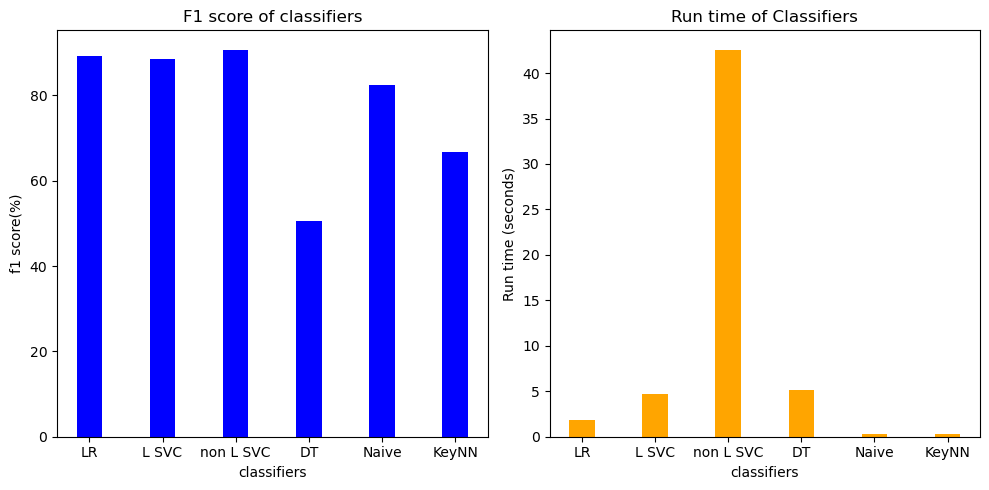

In [203]:
# Bar width
bar_width = 0.35

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first set of bars in the first subplot
bar1 = ax1.bar(np.arange(len(classifiers)), f1_score, bar_width, label='Bar 1', color='blue')

# Set labels, title, and legend for the first subplot
ax1.set_xlabel('classifiers')
ax1.set_ylabel('f1 score(%)')
ax1.set_title('F1 score of classifiers')
ax1.set_xticks(np.arange(len(classifiers)))
ax1.set_xticklabels(classifiers)
# Plot the second set of bars in the second subplot
bar2 = ax2.bar(np.arange(len(classifiers)), run_time, bar_width, label='Bar 2', color='orange')

# Set labels, title, and legend for the second subplot
ax2.set_xlabel('classifiers')
ax2.set_ylabel('Run time (seconds)')
ax2.set_title('Run time of Classifiers')
ax2.set_xticks(np.arange(len(classifiers)))
ax2.set_xticklabels(classifiers)
# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

Summary

1. Generally the TF-DF models perform better than the Bag of Words(BOW) models except the Decision Trees.

2. Balanced data models perform better than the unbalanced data except for the decision trees. 

3. Non Linear SVC is the best performing model but it has the highest run time 

<a id="eight"></a>

## 8. Model Explanations

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

| ⚡ Description: Model explanation ⚡                                                                                                                                                                              |
| :---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| In this section, we discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---


Surface Vector Classifier

A support vector classifiers constructs a hyperplane or set of hyperplanes in a high or infinite-dimensional space, which can be used for classification, regression, or other tasks like outliers detection. 


 1. Linear SVM:
Find the hyperplane that best separates the data into different classes.
Linear SVM uses a linear kernel, meaning it defines the decision boundary as a straight line.Linear SVM is effective when the data is linearly separable (can be separated by a straight line in 2D or a hyperplane in higher dimensions).

2. Nonlinear SVM with a Different Kernel:
Handle nonlinear decision boundaries.
Nonlinear SVM uses different kernel functions to transform the input space, allowing it to capture complex relationships.
Radial Basis Function (RBF) Kernel (default): Suitable for cases where the decision boundary is complex and not easily captured by a straight line or a plane.

How It Works:
1) Lifting to a Higher Dimension:
Non-linear SVC takes your tweet messages and imagines it in a higher-dimensional space.
This higher-dimensional space allows for more complex relationships between features.

2. Creating a Flexible Boundary:
In this higher-dimensional space, the algorithm finds a surface that can flex and curve to effectively separate the sentiments.

3. Capturing Complex Patterns:
This flexibility is crucial for handling complex patterns and relationships between messages and sentiments that a simple straight line can't capture.

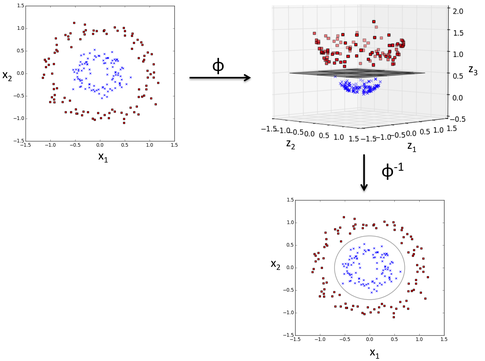


CONCLUSION

Project Findings:

Explored multiple machine learning models to understand emotions in text data.
Investigated various techniques, including Bag of Words (BOW) and Term Frequency-Inverse Document Frequency (TF-IDF), to represent text features.
Implemented a range of models such as Logistical Regression, Linear SVC, Non-Linear SVC, Decision Trees, Naive Bayes, and K-Nearest Neighbors.
Dealt with imbalanced data by resampling and achieved better results in balanced accuracy and F1-score.
Non-Linear SVC with TF-IDF emerged as the top-performing model in both balanced accuracy and F1-score.


OBJECTIVE:

The main goal was to build a model capable of accurately classifying emotions in text data.
Methods Employed:

DATA REPRESENTATION:

Explored Bag of Words (BOW) and TF-IDF techniques to represent the text features.
Model Selection:

Utilized various machine learning models, including Logistical Regression, Linear SVC, Non-Linear SVC, Decision Trees, Naive Bayes, and K-Nearest Neighbors.

HANDLING IMBLANCE DATA:

Resampled data to address class imbalances for more robust model training.

PERFORMING METRICS:

Evaluated models based on balanced accuracy and F1-score to account for imbalanced classes.

BEST PERFORMING MODEL

Non-Linear SVC with TF-IDF features stood out as the best-performing model, demonstrating superior accuracy and F1-score in handling emotions within text data.